In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd


In [3]:
def genGaussianSamples(N, m, C):
    A = np.linalg.cholesky(C)
    U = np.random.randn(N,2)
    return(U @ A.T + m)
# Define three means
#
Means = np.array([[0, 3], [3, 0], [4,4]])
# Define three covariance matrices ensuring
# they are positive definite
#
from sklearn.datasets import make_spd_matrix
CovMatrices = np.zeros((3,2,2))
for j in range(3):
    CovMatrices[j,:,:] = make_spd_matrix(2)
# Priors
#
w = np.random.rand(3)
w = w / np.sum(w)
# How many data in each component (1000 in total)
#
nData = np.floor(w * 1000).astype(int)
# Draw samples from each component
#
X0 = genGaussianSamples(nData[0], Means[0,:], CovMatrices[0,:,:])
X1 = genGaussianSamples(nData[1], Means[1,:], CovMatrices[1,:,:])
X2 = genGaussianSamples(nData[2], Means[2,:], CovMatrices[2,:,:])
# Append into an array for the data we need
#
X = np.append(np.append(X0, X1, axis=0), X2, axis=0)

In [ ]:
def gauss2D(x, m, C): #Probability density 2D 高斯
    n = m.shape[0]
    Ci = np.linalg.inv(C) #矩阵求逆
    dC = np.linalg.det(C1) #矩阵求行列式(scaler)
    
    num = np.exp(-0.5 * np.dot((x-m).T, np.dot(Ci, (x-m)))) #马氏
    den = np.sqrt((2*np.pi)**n * dC)
    return num/den


def twoDGaussianPlot (nx, ny, m, C): #
    x = np.linspace(-3, 8, nx) #均匀返回数字 nx(50)多少个
    y = np.linspace(-3, 8, ny)
    X, Y = np.meshgrid(x, y, indexing='ij') # 返回两个二维矩阵，meshgrid函数将两个输入的数组x和y进行扩展，前一个是竖向扩展，后一个是横向扩展
    #X=50*40 T=50*40  ij 为下标
    
    Z = np.zeros([nx, ny]) #50*40
    for i in range(nx):
        for j in range(ny):
            xvec = np.array([X[i,j], Y[i,j]]) # 50*40的 array 就是二维数组，一个元素是一个（x，y）
            Z[i,j] = gauss2D(xvec, m, C)  #返回Probability density
    return X, Y, Z

In [ ]:
# Plot contours
#
nx, ny = 50, 40
m1 = Means[0]
C1 = CovMatrices[0]
Xp1, Yp1, Zp1 = twoDGaussianPlot (nx, ny, m1, C1)

m2 = Means[1]
C2 = CovMatrices[1]
Xp2, Yp2, Zp2 = twoDGaussianPlot (nx, ny, m2, C2)

m3 = Means[2]
C3 = CovMatrices[2]
Xp3, Yp3, Zp3 = twoDGaussianPlot (nx, ny, m3, C3)

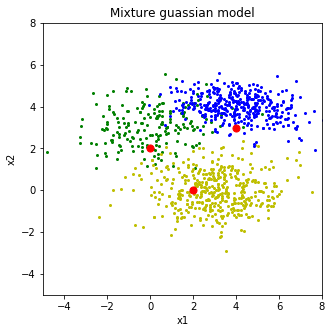

In [10]:
fig, ax = plt.subplots(figsize=(5,5))
ax.scatter(X0[:,0], X0[:,1], c="g", s=4)
ax.scatter(X1[:,0], X1[:,1], c="y", s=4)
ax.scatter(X2[:,0], X2[:,1], c="b", s=4)
ax.scatter(centroids[0,0],centroids[0,1],c = 'r',s=50,label = '1')
ax.scatter(centroids[1,0],centroids[1,1],c = 'r',s=50,label = '2')
ax.scatter(centroids[2,0],centroids[2,1],c = 'r',s=50,label = '3')

# for i in range(0,len(wrong_label),1):
#     ax.scatter(wrong_label[i][0,1],wrong_label[i][0,2],c = 'r',s=5)
ax.set_xlim(-5,8)
ax.set_ylim(-5,8)
ax.set_xlabel("x1")
ax.set_ylabel("x2")
ax.set_title("Mixture guassian model")
plt.savefig("k5.png")

In [ ]:
fig, ax = plt.subplots(figsize=(5,5))

ax.scatter(X0[:,0], X0[:,1], c="g", s=4)
ax.scatter(X1[:,0], X1[:,1], c="y", s=4)
ax.scatter(X2[:,0], X2[:,1], c="b", s=4)
ax.scatter(centroids[0,0],centroids[0,1],c = 'darkorange',s=50,label = '1')
ax.scatter(centroids[1,0],centroids[1,1],c = 'r',s=50,label = '2')
ax.scatter(centroids[2,0],centroids[2,1],c = 'fuchsia',s=50,label = '3')
ax.set_xlim(-5,8)
ax.set_ylim(-5,8)
ax.contour(Xp1, Yp1, Zp1, 5)
ax.contour(Xp2, Yp2, Zp2, 5)
ax.contour(Xp3, Yp3, Zp3, 5)
ax.set_xlabel("x1")
ax.set_ylabel("x2")
ax.set_title("contour of Mixture guassian model")
ax.grid()
plt.savefig('contour.png')

In [ ]:
X.shape

In [41]:
import numpy as np
import matplotlib.pyplot as plt


def distEclud(x,y):
    return np.sqrt(np.sum((x-y)**2))  # distance


def randCent(dataSet,k):  #k random center
    m,n = dataSet.shape  
    centroids = np.zeros((k,n))
    for i in range(k):
        index = int(np.random.uniform(0,m)) #
        centroids[i,:] = dataSet[index,:]
    return centroids


def KMeans(dataSet,k):

    m = np.shape(dataSet)[0]  
    clusterAssment = np.mat(np.zeros((m,4)))
    clusterChange = True
    path = np.zeros((3,2))
#     labe = np.mat(np.zeros((m,3)))
    # select a center
    centroids = np.array([[4, -4], [4, -2], [6,-2]])#randCent(dataSet,k)
#     path.append(centroids)


    while clusterChange:
        clusterChange = False
        path = np.vstack((path,centroids))
        for i in range(m):
            minDist = 100000.0
            minIndex = -1
            
            for j in range(k):
                distance = distEclud(centroids[j,:],dataSet[i,:])
                if distance < minDist:
                    minDist = distance
                    minIndex = j
            if clusterAssment[i,0] != minIndex:
                clusterChange = True
                clusterAssment[i,:] = minIndex,minDist**2,dataSet[i,0],dataSet[i,1]
            else:
                clusterAssment[i,:] = minIndex,minDist**2,dataSet[i,0],dataSet[i,1]
        
        for j in range(k):
            pointsInCluster = dataSet[np.nonzero(clusterAssment[:,0].A == j)[0]]  
            centroids[j,:] = np.mean(pointsInCluster,axis=0)   
#         path = np.vstack((path,centroids))
#         print(centroids)
    return centroids,clusterAssment,path

dataSet = X 
k = 3
centroids,clusterAssment,path = KMeans(dataSet,k)

D:\anaconda\envs\tensorflow\lib\site-packages\numpy\core\fromnumeric.py:3257: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
D:\anaconda\envs\tensorflow\lib\site-packages\numpy\core\_methods.py:154: RuntimeWarning: invalid value encountered in true_divide
  ret, rcount, out=ret, casting='unsafe', subok=False)


In [ ]:
# for i in range(len(clusterAssment)):
#     print(clusterAssment[i,0],clusterAssment[i,2],clusterAssment[i,3])

In [ ]:
fig, ax = plt.subplots(figsize=(5,5))
for i in range(len(clusterAssment)):
    if clusterAssment[i,0] == 0:
        ax.scatter(clusterAssment[i,2],clusterAssment[i,3],c = 'g',s=5)
    if clusterAssment[i,0] == 1:
        ax.scatter(clusterAssment[i,2],clusterAssment[i,3],c = 'y',s=5)
    if clusterAssment[i,0] == 2:
        ax.scatter(clusterAssment[i,2],clusterAssment[i,3],c = 'b',s=5)

# ax.scatter(centroids[0,0],centroids[0,1],c = 'darkorange',s=20,label = '0')
# ax.scatter(centroids[1,0],centroids[1,1],c = 'r',s=20,label = '1')
# ax.scatter(centroids[2,0],centroids[2,1],c = 'fuchsia',s=20,label = '2')
# for i in range(len(wrong_label)):
#     ax.scatter(wrong_label[i][0,1],wrong_label[i][0,2],c = 'r',s=5)
ax.set_xlim(-5,8)
ax.set_ylim(-5,8)
ax.set_xlabel("x1")
ax.set_ylabel("x2")
ax.set_title("Classification of K-means")
plt.savefig("k.png")

In [ ]:
orignal_label = np.mat(np.zeros((len(X),3)))
for i in range(len(X)):
    if i <  nData[0]:
        orignal_label[i,:] = 0,X[i,0],X[i,1]
    elif i < nData[0]+nData[1]:
        orignal_label[i,:] = 1,X[i,0],X[i,1]
    else:
        orignal_label[i,:] = 2,X[i,0],X[i,1]

In [ ]:
wrong_label=[]
for i in range(len(X)):
    if orignal_label[i,1] == clusterAssment[i,2] and orignal_label[i,2] == clusterAssment[i,3]:
        print (orignal_label[i,0], clusterAssment[i,0])
        if orignal_label[i,0] != clusterAssment[i,0]:
            wrong_label.append(orignal_label[i,:])


In [ ]:
len(wrong_label)

In [ ]:
totle0 = 0
totle1 = 0
totle2 = 0

for i in range(len(wrong_label)):
    if wrong_label[i][0,0] == 0:
        totle0 = totle0+1
    if wrong_label[i][0,0] == 1:
        totle1 = totle1+1
    if wrong_label[i][0,0] == 2:
        totle1 = totle1+1


In [ ]:
print(totle0,totle1,totle2)

4.0 -4.0
4.0 -2.0
6.0 -2.0


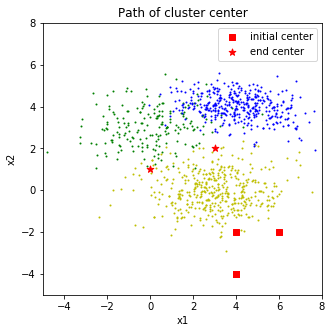

In [42]:
fig, ax = plt.subplots(figsize=(5,5))

ax.scatter(X0[:,0], X0[:,1], c="g", s=1)
ax.scatter(X1[:,0], X1[:,1], c="y", s= 1)
ax.scatter(X2[:,0], X2[:,1], c="b", s=1)
ax.set_xlabel("x1")
ax.set_ylabel("x2")
ax.set_title("Path of cluster center")

# for i in range(3,len(path),3):
#     ax.scatter(path[i,0],path[i,1],c = 'r',s = 30)
#     ax.scatter(path[i+1,0],path[i+1,1],c = 'r',s = 30)
#     ax.scatter(path[i+2,0],path[i+2,1],c = 'r',s = 30)

for i in range(3):
    ax.scatter(path[i+3,0],path[i+3,1],c = 'r',s = 30, marker = "s")
    print(path[i+3,0],path[i+3,1])
ax.scatter(path[3,0],path[3,1],c = 'r',s = 30, marker = "s",label = 'initial center')
ax.scatter(centroids[0,0],centroids[0,1],c = 'r',s=50,label = 'end center',marker = "*")
ax.scatter(centroids[1,0],centroids[1,1],c = 'r',s=50,marker = "*")
ax.scatter(centroids[2,0],centroids[2,1],c = 'r',s=50,marker = "*")
ax.set_xlim(-5,8)
ax.set_ylim(-5,8)
plt.savefig("path_fail1.png")
plt.legend()

In [17]:
path

array([[ 0.,  0.],
       [ 0.,  0.],
       [ 0.,  0.],
       [-2., -2.],
       [-2.,  0.],
       [-2.,  2.],
       [ 2., -1.],
       [ 3.,  0.],
       [ 2.,  3.],
       [ 1.,  0.],
       [ 3.,  0.],
       [ 2.,  3.],
       [ 0.,  0.],
       [ 3.,  0.],
       [ 2.,  3.],
       [ 0.,  0.],
       [ 3.,  0.],
       [ 3.,  3.],
       [ 0.,  1.],
       [ 3.,  0.],
       [ 3.,  3.],
       [ 0.,  2.],
       [ 3.,  0.],
       [ 3.,  3.],
       [ 0.,  2.],
       [ 3.,  0.],
       [ 3.,  3.]])

In [34]:
import pandas
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
kmeans = KMeans(n_clusters = 3)
res = kmeans.fit(X)  

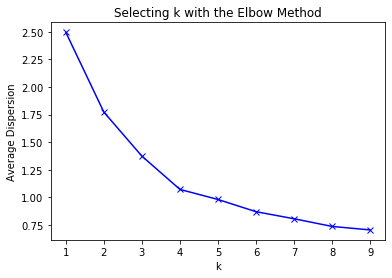

In [40]:
# KMeans
import scipy
# choose k value with elbow method
K = range(1, 10)
meanDispersions = []
train_scaled =X
for k in K:
    kmeans = KMeans(n_clusters=k)
    # kmeans = MiniBatchKMeans(n_clusters=k)  # 如果数据量大的话，例如十万条以上，可以用mini-batch kmeans
    kmeans.fit(train_scaled)
    #理解为计算某个与其所属类聚中心的欧式距离
    #最终是计算所有点与对应中心的距离的平方和的均值
    meanDispersions.append(sum(np.min(scipy.spatial.distance.cdist(train_scaled, kmeans.cluster_centers_, 'euclidean'), axis=1)) / train_scaled.shape[0])

plt.plot(K, meanDispersions, 'bx-')
plt.xlabel('k')
plt.ylabel('Average Dispersion')
plt.title('Selecting k with the Elbow Method')

plt.savefig("kselection.png")

In [ ]:
score_sk = silhouette_score(X,res.labels_)
score

In [ ]:
score = silhouette_score(X,clusterAssment[:,0])

In [ ]:
score

In [ ]:
res.inertia_ 

In [ ]:
tot =0
for i in range(len(clusterAssment)):
    tot = tot + clusterAssment[i,1]

In [ ]:
tot

In [ ]:
from sklearn import metrics
score = metrics.calinski_harabaz_score(X,res.labels_)
score

In [ ]:
score = metrics.calinski_harabaz_score(X,clusterAssment[:,0])
score

In [43]:
from sklearn.datasets import load_iris
iris = load_iris()
df = pd.DataFrame(iris.data, columns=iris.feature_names)
df['label'] = iris.target

In [44]:
df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),label
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


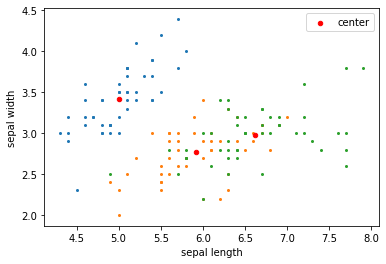

In [50]:
plt.scatter(df[:49]['sepal length (cm)'], df[:49]['sepal width (cm)'], s = 4)
plt.scatter(df[50:99]['sepal length (cm)'], df[50:99]['sepal width (cm)'], s = 4)
plt.scatter(df[100:149]['sepal length (cm)'], df[100:149]['sepal width (cm)'], s = 4)
plt.scatter(res.cluster_centers_[:,0],res.cluster_centers_[:,1],c = "r", s = 20,label = "center")
plt.xlabel('sepal length')
plt.ylabel('sepal width')
plt.legend()
plt.savefig("sepallength_class.png")

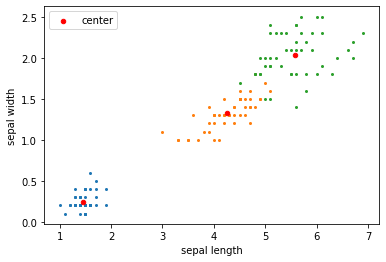

In [51]:
plt.scatter(df[:49]['petal length (cm)'], df[:49]['petal width (cm)'], s = 4)
plt.scatter(df[50:99]['petal length (cm)'], df[50:99]['petal width (cm)'], s = 4)
plt.scatter(res.cluster_centers_[:,2],res.cluster_centers_[:,3],c = "r", s = 20,label = "center")
plt.scatter(df[100:149]['petal length (cm)'], df[100:149]['petal width (cm)'], s = 4)
plt.xlabel('sepal length')
plt.ylabel('sepal width')
plt.legend()
plt.savefig("petallength_class.png")

In [46]:
import pandas
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
kmeans = KMeans(n_clusters = 3)
res = kmeans.fit(df)  

In [47]:
res.cluster_centers_ 

array([[5.006     , 3.418     , 1.464     , 0.244     , 0.        ],
       [5.91568627, 2.76470588, 4.26470588, 1.33333333, 1.01960784],
       [6.62244898, 2.98367347, 5.57346939, 2.03265306, 2.        ]])